In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset
df = pd.read_csv('creditcard.csv')

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

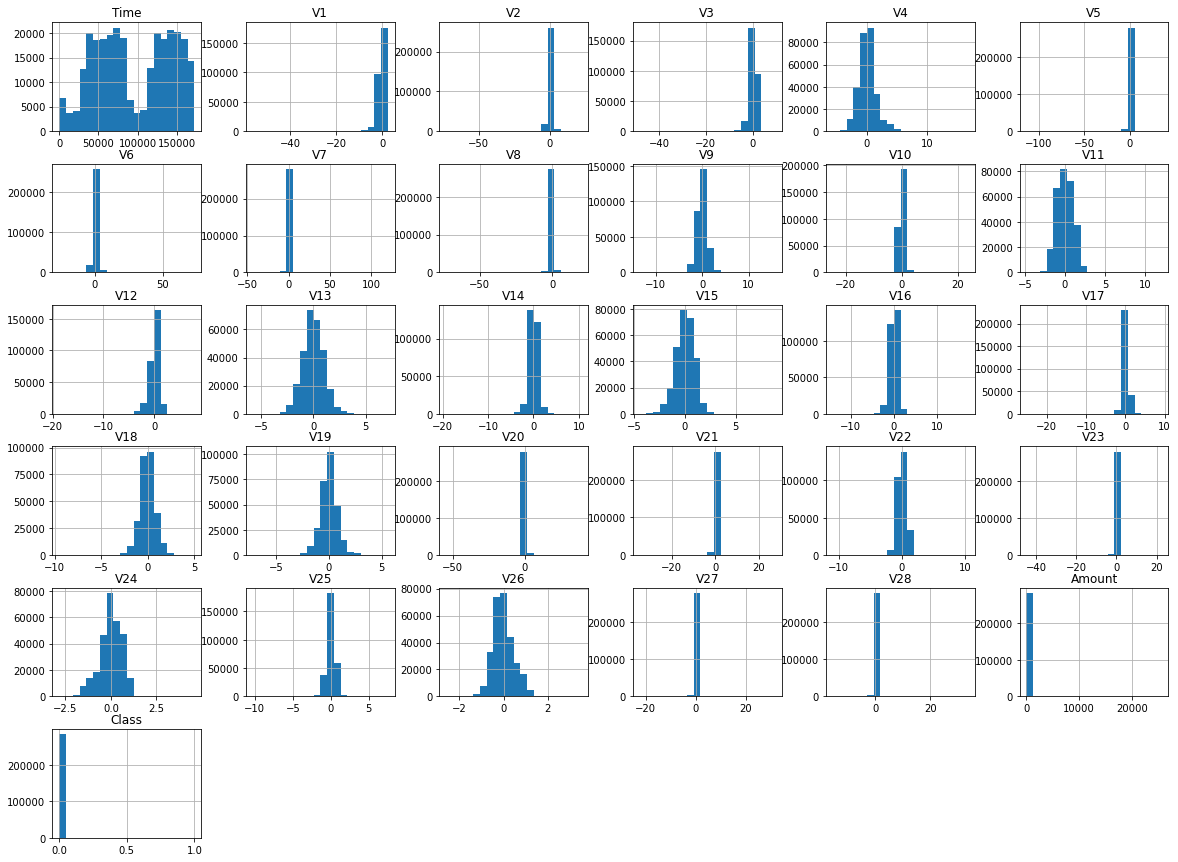

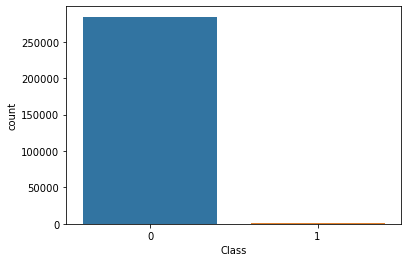

In [3]:
# EDA
print(df.shape)
print(df.head())
print(df.isnull().sum())

df.hist(bins=20, figsize=(20,15))
plt.show()

sns.countplot(x='Class', data=df)
plt.show()


In [4]:
# Preprocess data
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape)


(190820, 30) (93987, 30)


In [5]:
# Label encode target
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [6]:
# Keras model
model = keras.Sequential()

model.add(keras.layers.Dense(16, input_shape=(30,), activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
5964/5964 [==============================] - 7s 1ms/step - loss: 0.1301 - accuracy: 0.9982 - val_loss: 0.0268 - val_accuracy: 0.9984
Epoch 2/5
5964/5964 [==============================] - 6s 1000us/step - loss: 0.0385 - accuracy: 0.9982 - val_loss: 0.0123 - val_accuracy: 0.9984
Epoch 3/5
5964/5964 [==============================] - 6s 999us/step - loss: 0.0135 - accuracy: 0.9982 - val_loss: 0.0127 - val_accuracy: 0.9984
Epoch 4/5
5964/5964 [==============================] - 6s 1ms/step - loss: 0.0143 - accuracy: 0.9982 - val_loss: 0.0118 - val_accuracy: 0.9984
Epoch 5/5
5964/5964 [==============================] - 6s 1ms/step - loss: 0.0132 - accuracy: 0.9982 - val_loss: 0.0118 - val_accuracy: 0.9984


In [8]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

y_pred = model.predict(X_test)

2938/2938 [==============================] - 2s 639us/step - loss: 0.0118 - accuracy: 0.9984
Test accuracy: 0.9984146952629089
2938/2938 [==============================] - 2s 566us/step


In [9]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
print(accuracy)

0.0015828684462930224
0.9984146952629089


2938/2938 [==============================] - 2s 567us/step
ROC-AUC Score: 0.500085253308894


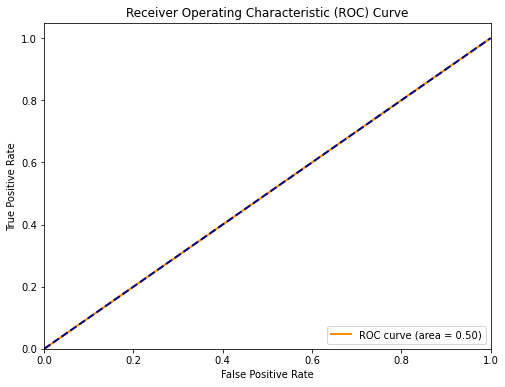

In [10]:
# ROC-AUC Score
y_pred_prob = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC-AUC Score:', roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [11]:
# Confusion Matrix
# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Threshold probabilities to obtain class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

2938/2938 [==============================] - 2s 570us/step
Confusion Matrix:
[[93838     0]
 [  149     0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.00      0.00      0.00       149

    accuracy                           1.00     93987
   macro avg       0.50      0.50      0.50     93987
weighted avg       1.00      1.00      1.00     93987



C:\Users\HP PAVILION\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP PAVILION\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP PAVILION\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Save model
model.save('creditcard_model.h5')